**Inventory Optimization and Sustainability Analysis**

Objectives:


1.   Minimize waste by optimizing inventory levels.
2.   Identify the most efficient purchasing strategies based on sales, procurement, and inventory data.
3.   Evaluate product sales performance to formulate a sustainable inventory management approach.

Path: 


1.   Data Preprocessing
2.   Inventory Analysis
3.   Sales Analysis
4.   Purchasing Analysis
5.   Optimal Stock Level Calculation

Conclusion:
The insights derived from these analyses will provide recommendations for managing inventory in a more efficient and sustainable manner, aiming to cut costs and prevent overstocking and waste.








In [20]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Read datasets
purchase_prices=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSLVaGmRwIzwhtRZvyPrvZFXtWCvWQvZqkObLp96ff92LGZ6zManSDw7XftxRspkgk01johEpejE7_x/pub?output=csv')
beg_inv=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT9wCKv8Ad3q5RIyjbKFVzvSNOJVclqR6TOQYwC6os9Raze6NaHnABijzWQ3ZxJY9AWTsOCcYmn9gWn/pub?output=csv')
end_inv=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSH5p2YX9PqB8uKT87pxL-Sh_HyhfkIh9_ApNVv8KKRX_CFElP7byPpZcm4YAQ9fuKrKJVa5EfH5fP8/pub?output=csv')
invoices_purchases=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRv76Y5jPq6Jdar7Wu5BQk_o_Pj5BMp_Pk_oNxE7ylVQydDI9r8VCcS3emtHfdwGitkhPga5RIDH6RF/pub?output=csv')
purchases = pd.read_csv(r'C:\Users\LARISSA\Documents\TUTORIALPY\env\InventoryAnalyst\PurchasesFINAL12312016.csv')
sales = pd.read_csv(r'C:\Users\LARISSA\Documents\TUTORIALPY\env\InventoryAnalyst\SalesFINAL12312016.csv')

In [5]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoices_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoices_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)


Missing values in purchase_prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in end_inv:
City    1284
dtype: int64

Missing values in invoices_purchases:
Approval    5169
dtype: int64

Missing values in purchases:
Size    3
dtype: int64


In [22]:
#Handling missing value for purchase_prices dataset
cols_to_check=['Description','Size','Volume']
for col in cols_to_check:
    purchase_prices=purchase_prices[purchase_prices[col].notna()]
#Handing missing value for end_inv dataset
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping))
else:
    end_inv['City'].fillna('Unknown', inplace=True)
#Handling missing value for invoices_purchases dataset
invoices_purchases['Approval'].fillna('Pending', inplace=True)
#Handling missing value for purchases dataset
purchases=purchases[purchases['Size'].notna()]
datasets = [purchase_prices, beg_inv, end_inv, invoices_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoices_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nNo missing values in {name}.")


C:\Users\LARISSA\AppData\Local\Temp\ipykernel_6996\829384108.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  end_inv['City'].fillna('Unknown', inplace=True)
C:\Users\LARISSA\AppData\Local\Temp\ipykernel_6996\829384108.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex


No missing values in purchase_prices.

No missing values in beg_inv.

No missing values in end_inv.

No missing values in invoices_purchases.

No missing values in purchases.

No missing values in sales.


2. Inventory Analysis

In [23]:
# Grouping by Brand and Description and summarize inventory for beginning of the year
beg_summary=beg_inv.groupby(['Brand','Description'])['onHand'].sum().sort_values(ascending=False)
# Grouping by Brand and Description and summarize inventory for end of the year
end_inv_summary=end_inv.groupby(['Brand','Description'])['onHand'].sum().sort_values(ascending=False)
# Identifying top 5 products at the beginning and end of the year
top_5_beg=beg_summary.head(5)
top_5_end=end_inv_summary.head(5)
# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_inv_summary.tail(5)
print("Top 5 products at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products at the end of the year:\n", top_5_end)
print("\nBottom 5 products at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products at the end of the year:\n", bottom_5_end)

Top 5 products at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products at the beginning of the year:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand  Descriptio

Inventory Management Observations:

The overall high consistency among the top products suggests steady demand and effective inventory replenishment strategies for popular items.
However, the consistent zero counts at both year start and end for certain products indicate potential issues in inventory management or procurement. It may be worthwhile to review the demand for these products and determine if it makes business sense to continue carrying them or if there might be supply chain issues preventing their restocking.

3. Sales Analysis

In [24]:
# Finding the best-selling products
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Best selling ten products:\n{best_selling_products}\n")

# Finding the slow-moving products
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Slow-moving ten products:\n{slow_moving_products}")

Best selling ten products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Slow-moving ten products:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Chaleur Blnc            

<Axes: title={'center': 'Sales Quantity Trend Over Time'}, xlabel='SalesDate'>

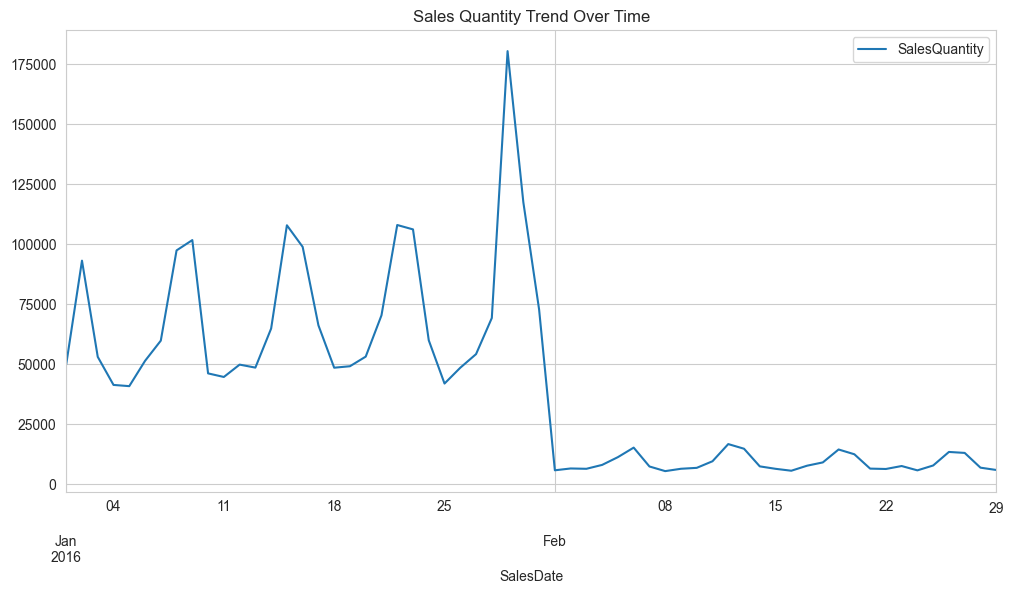

In [32]:
#Data visualization
sales['SalesDate']=pd.to_datetime(sales['SalesDate'])
sales_quatity_trend=sales.groupby('SalesDate').agg({'SalesQuantity':'sum'})
sales_quatity_trend.plot(title='Sales Quantity Trend Over Time', figsize=(12,6))    

<Axes: title={'center': 'Average Price Trend Over Time'}, xlabel='SalesDate'>

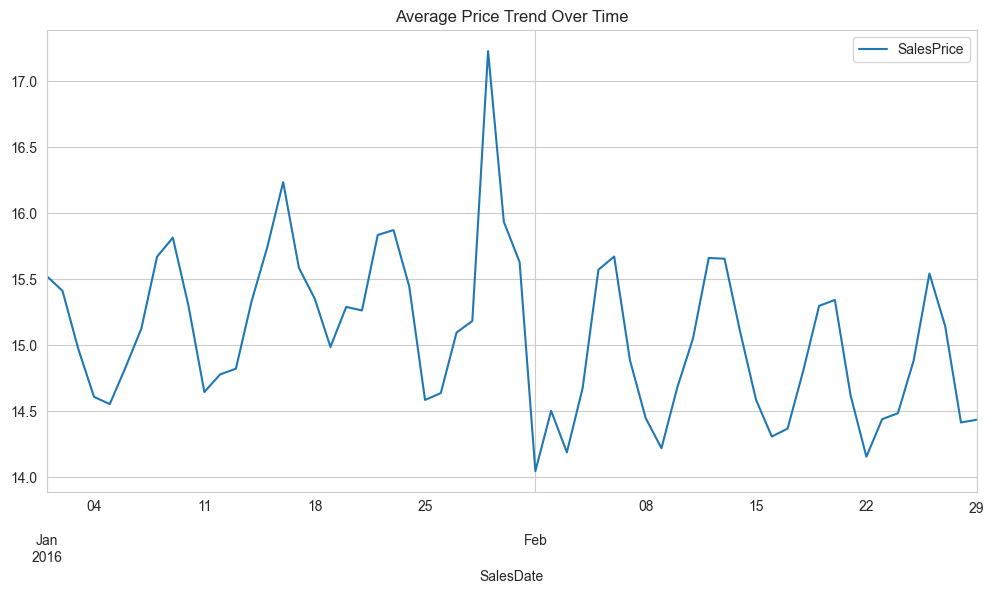

In [33]:
avg_price_trnd=sales.groupby('SalesDate').agg({'SalesPrice':'mean'})
avg_price_trnd.plot(title='Average Price Trend Over Time', figsize=(12,6))

Conclusions: 
1. There's a cyclical nature to the sales quantities, which might hint at weekly patterns or trends.
2. A significant peak is noticed around January 25th; this could be attributed to specific events, promotions, or even seasonal demands. However, as we transition into February, there's a noticeable decline in sales, which then appears to stabilize as the month progresses.
3. Spirits like "Smirnoff 80 Proof" emerge as the top sellers, reflecting a steady demand. On the other hand, several products are moving slowly, indicating limited sales. As these products vary in type and brand, a strategic review might be necessary to decide on their continued stocking.

4. Purchasing Analysis

In [25]:
vendor_purchase_volume=invoices_purchases.groupby('VendorName').agg({'Quantity':'sum'}).sort_values(by='Quantity', ascending=False).head(10)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))

Top 10 Vendors by Purchase Volume:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


In [12]:
vendor_purchase_cost=purchases.groupby('VendorName').agg({'PurchasePrice':'sum'}).sort_values(by='PurchasePrice', ascending=False).head(10)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))

Top 10 Vendors by Purchase Cost:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC        3919293.52
JIM BEAM BRANDS COMPANY         2445075.37
PERNOD RICARD USA               2002210.70
MARTIGNETTI COMPANIES           1954748.37
ULTRA BEVERAGE COMPANY LLP      1328577.74
CONSTELLATION BRANDS INC        1316920.86
BACARDI USA INC                 1309369.34
E & J GALLO WINERY              1179960.50
BROWN-FORMAN CORP               1089218.08
M S WALKER INC                   979018.30


Top Vendors by Purchase Cost:

1. DIAGEO NORTH AMERICA INC stands out as the top vendor with the highest purchase cost, amounting to 3,919,293.52 US dollars.
2. The following two vendors, 'JIM BEAM BRANDS COMPANY' and 'PERNOD RICARD USA', have notable purchase costs of 2,445,075.37 and 2,002,210.70, respectively.
3. It's interesting to see that the top 10 vendors have a significant difference in their purchase costs, with 'DIAGEO NORTH AMERICA INC' nearly leading by a margin of 1.5 million usd from the vendor in the second position.

In [26]:
# Converting PODate and ReceivingDate columns to datetime
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')
# Checking if there are any null values after conversion
if purchases['PODate'].isnull().any() or purchases['ReceivingDate'].isnull().any():
    print("There are null values in PODate or ReceivingDate after conversion.")
else: 
    purchases['SupplyDuration']=(purchases['ReceivingDate']-purchases['PODate']).dt.days
    average_supply_duration=(purchases['SupplyDuration'].mean())
    print(f"The average supply duration is {average_supply_duration} days.")

The average supply duration is 7.620737197630656 days.


In [27]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'], errors='coerce')
purchases['PayDate']=pd.to_datetime(purchases['PayDate'], errors='coerce')
purchases['PaymentDuration']=(purchases['PayDate']-purchases['InvoiceDate']).dt.days
average_payment_duration=(purchases['PaymentDuration'].mean())
print(f"The average payment duration is {average_payment_duration} days.")

The average payment duration is 35.658806366863914 days.


Supply and Payment Durations:.

On average, it takes approximately 8 days for the supply process, which indicates a relatively quick turnaround for receiving products after placing an order.
However, the payment duration averages around 35.66 days. This could mean that there might be longer credit terms agreed upon with the vendors or there might be some delay in the payment process.

In [28]:
reduced_purchases=purchases[['VendorName', 'PurchasePrice']]
top_vendors=reduced_purchases.groupby('VendorName').sum().sort_values(by='PurchasePrice', ascending=False).head(10)
print("Top Vendors by Purchase Cost:\n", top_vendors)

Top Vendors by Purchase Cost:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC        3919293.52
JIM BEAM BRANDS COMPANY         2445075.37
PERNOD RICARD USA               2002210.70
MARTIGNETTI COMPANIES           1954748.37
ULTRA BEVERAGE COMPANY LLP      1328577.74
CONSTELLATION BRANDS INC        1316920.86
BACARDI USA INC                 1309369.34
E & J GALLO WINERY              1179960.50
BROWN-FORMAN CORP               1089218.08
M S WALKER INC                   979018.30


<Figure size 1000x600 with 0 Axes>

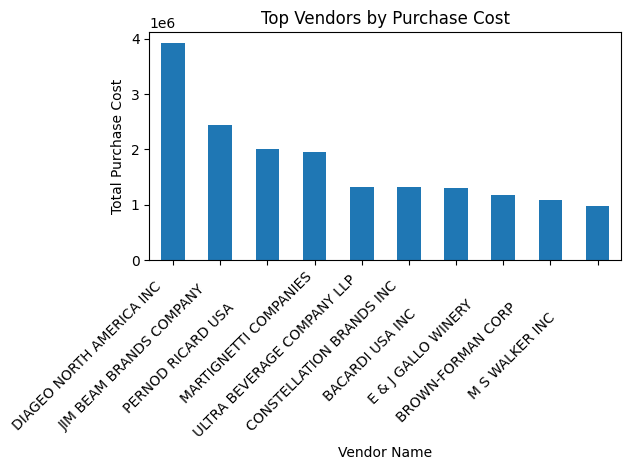

In [16]:
# Bar graph for top vendors by purchase cost
plt.figure(figsize=(10,6))
top_vendors.plot(kind='bar', legend=False)
plt.title('Top Vendors by Purchase Cost')
plt.xlabel('Vendor Name')
plt.ylabel('Total Purchase Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


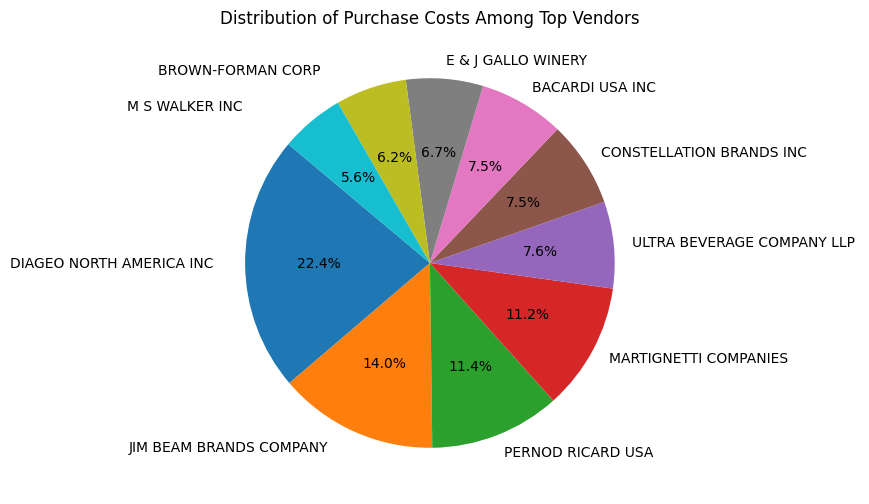

In [17]:
# Pie chart for distribution of purchase costs among the top vendors
plt.figure(figsize=(10, 6))
top_vendors.iloc[:, 0].plot(kind='pie', autopct='%1.1f%%', startangle=140)  # Use first column
plt.title('Distribution of Purchase Costs Among Top Vendors')
plt.ylabel('')
plt.show()


The bar chart illustrates the top 10 vendors by purchase cost. We observe that "DIAGEO NORTH AMERICA INC" clearly dominates, with a significantly higher purchase cost compared to others. The other vendors, like "JIM BEAM BRANDS COMPANY" and "PERNOD RICARD USA", have a more consistent distribution, showing a balanced spending across them.

Transitioning to the pie chart, which provides a distribution of purchase costs among top vendors, we get a more granular view. "DIAGEO NORTH AMERICA INC" accounts for 22.4% of the total purchase costs among the top vendors. The other vendors hold percentages ranging from 5.6% to 14%, indicating a more even distribution of costs among them.

In conclusion, while there's a dominant vendor in terms of purchase cost, the overall distribution among the top vendors is relatively even, with only a few outliers. This suggests a diversified vendor strategy, but with a few preferred partnerships.

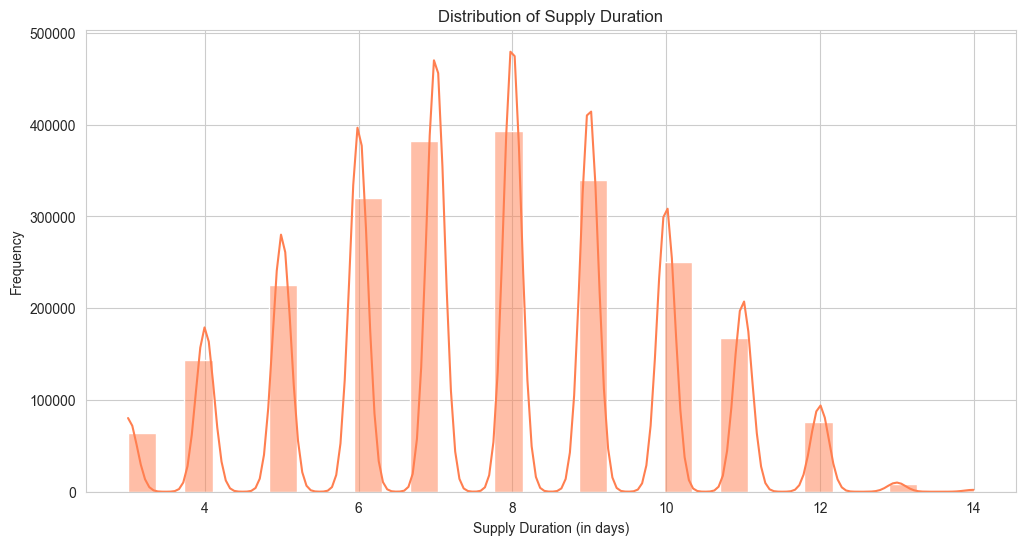

In [18]:
# Style settings
sns.set_style("whitegrid")

# Histogram for Supply Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='coral')
plt.title('Distribution of Supply Duration')
plt.xlabel('Supply Duration (in days)')
plt.ylabel('Frequency')
plt.show()

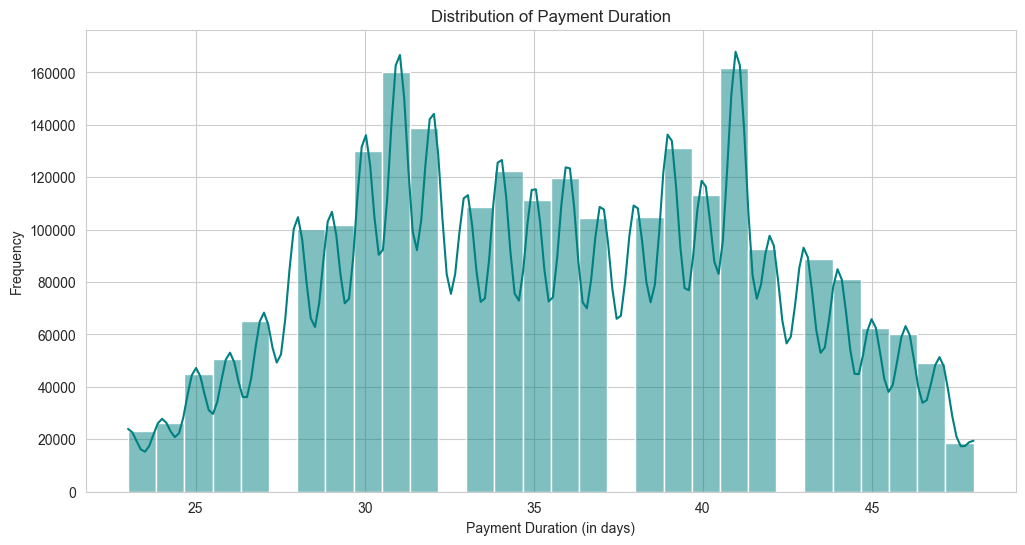

In [29]:
# Histogram for Payment Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='teal')
plt.title('Distribution of Payment Duration')
plt.xlabel('Payment Duration (in days)')
plt.ylabel('Frequency')
plt.show()

Here's some observations,

1. The regular intervals observed in the supply duration chart suggest that there might be specific supply cycles or replenishment schedules that are adhered to.
2. Peaks in the supply distribution, particularly around 4, 6, 8, 10, and 12 days, might indicate standard supply contract durations or preferred restocking periods.
3. The oscillation in payment durations, especially between 25 to 45 days, suggests variability in the terms of payment or potential inconsistencies in payment execution.

In [34]:
start_date=sales['SalesDate'].min()
end_date=sales['SalesDate'].max()
total_days=(end_date-start_date).days
#Calculate sales velocity for each product
sales_velocity=sales.groupby(['Brand','Description']).agg({'SalesQuantity':'sum'})
sales_velocity['SalesVelocity']=sales_velocity['SalesQuantity']/total_days
print(sales_velocity.sort_values(by='SalesVelocity', ascending=False).head(10))

                                    SalesQuantity  SalesVelocity
Brand Description                                               
8111  Smirnoff 80 Proof                     28544     483.796610
1892  Yukon Jack                            23121     391.881356
4261  Capt Morgan Spiced Rum                20226     342.813559
3606  Smirnoff Raspberry Vodka              19200     325.423729
5111  Dr McGillicuddy's Mentholmnt          18411     312.050847
3837  Skyy Vodka                            14057     238.254237
4135  Smirnoff Blueberry Vodka              12477     211.474576
4157  Smirnoff Green Apple Vodka            12102     205.118644
3545  Ketel One Vodka                       11883     201.406780
8068  Absolut 80 Proof                      11189     189.644068


In [44]:
purchases.loc[:, 'LeadTime']=(purchases['ReceivingDate']-purchases['PODate']).dt.days
lead_time_stats=purchases.groupby(['Brand','Description']).agg(Avg_Lead_Time=('LeadTime', 'mean')).reset_index()
print(lead_time_stats.sort_values(by='Avg_Lead_Time', ascending=False).head(10))

      Brand                   Description  Avg_Lead_Time
4237  14347    De Martino Cab Svgn Estate           14.0
2827   6416            La Fee NV Absinthe           13.0
5122  18073             Debauchery Pnt Nr           13.0
2659   5795  Courvoisier L'Essence Cognac           13.0
6662  22624        A Bichot Merc Champs M           13.0
125     351  Rittenhouse Rye Bonded Whsky           13.0
5023  17528    Dom Serene Roadblock Syrah           13.0
8987  27826  Jadot Chass Mont Morgeot Rou           12.2
8983  27811   Dom Ferret Les Perrieres 14           12.2
8959  27781  Jadot Cote de Beaune Vlgs 14           12.2


In [36]:
#Mergin the data
merged_data=pd.merge(sales_velocity, lead_time_stats, on=['Brand','Description'], how='left')
print(merged_data.sort_values(by='SalesVelocity', ascending=False).head(10))

      Brand                   Description  SalesQuantity  SalesVelocity  \
2537   8111             Smirnoff 80 Proof          28544     483.796610   
594    1892                    Yukon Jack          23121     391.881356   
1655   4261        Capt Morgan Spiced Rum          20226     342.813559   
1334   3606      Smirnoff Raspberry Vodka          19200     325.423729   
1886   5111  Dr McGillicuddy's Mentholmnt          18411     312.050847   
1478   3837                    Skyy Vodka          14057     238.254237   
1592   4135      Smirnoff Blueberry Vodka          12477     211.474576   
1603   4157    Smirnoff Green Apple Vodka          12102     205.118644   
1309   3545               Ketel One Vodka          11883     201.406780   
2520   8068              Absolut 80 Proof          11189     189.644068   

      Avg_Lead_Time  
2537       7.619963  
594        7.678691  
1655       7.343519  
1334       7.696203  
1886       7.549521  
1478       7.455844  
1592       7.694620 

In [37]:
#Calculating optimal stock level
merged_data['Optimal_Stock_Level'] = merged_data['SalesVelocity'] * merged_data['Avg_Lead_Time']
print(merged_data.sort_values(by='Optimal_Stock_Level', ascending=False).head(10))

      Brand                   Description  SalesQuantity  SalesVelocity  \
2537   8111             Smirnoff 80 Proof          28544     483.796610   
594    1892                    Yukon Jack          23121     391.881356   
1655   4261        Capt Morgan Spiced Rum          20226     342.813559   
1334   3606      Smirnoff Raspberry Vodka          19200     325.423729   
1886   5111  Dr McGillicuddy's Mentholmnt          18411     312.050847   
1478   3837                    Skyy Vodka          14057     238.254237   
1592   4135      Smirnoff Blueberry Vodka          12477     211.474576   
1603   4157    Smirnoff Green Apple Vodka          12102     205.118644   
1309   3545               Ketel One Vodka          11883     201.406780   
2025   5491                   Rumpleminze          11027     186.898305   

      Avg_Lead_Time  Optimal_Stock_Level  
2537       7.619963          3686.512173  
594        7.678691          3009.135949  
1655       7.343519          2517.458002  
13

In [38]:
# Calculating Safety Stock using maximum sales for each product
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()

# Merge the max_sales data correctly
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')

# Now calculate the safety stock and recommended stock level
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['SalesVelocity']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

In [39]:
# Filtering products where Sales_Per_Day value is greater than Max_Daily_Sales value
problematic_products = merged_data[merged_data['SalesVelocity'] > merged_data['Max_Daily_Sales']]
# Getting the number of problematic products
num_problematic_products = len(problematic_products)
# Printing problematic products to the screen
print(f"There are {num_problematic_products} products where the SalesVelocity value is greater than the Max_Daily_Sales value.")
if num_problematic_products > 0:
    print(problematic_products[['Brand', 'Description', 'SalesVelocity', 'Max_Daily_Sales']])

There are 555 products where the SalesVelocity value is greater than the Max_Daily_Sales value.
      Brand                   Description  SalesVelocity  Max_Daily_Sales
7        77   Three Olives Espresso Vodka      15.389831                8
8        79      Three Olives Loopy Vodka       7.050847                5
76      273      Sauza Extra Gold Tequila      10.372881                9
139     482              Absolut 80 Proof      37.135593               23
142     497        Capt Morgan Spiced Rum      39.644068               38
...     ...                           ...            ...              ...
7426  44712    Sonoma-Cutrer Chard Sonoma      27.610169               25
7580  46379  Ghost Pine Cab Svgn LMartini      14.474576               12
7590  46447         Gascon Malbec Mendoza      22.796610               16
7592  46458      Layer Cake Barosa Shiraz       7.305085                7
7594  46476          Tilia Malbec Mendoza      26.169492               19

[555 rows x 4 c

In [40]:
#Updating Max_Daily_Sales for problematic products
merged_data.loc[merged_data['SalesVelocity'] > merged_data['Max_Daily_Sales'], 'Max_Daily_Sales'] = merged_data['SalesVelocity'] 
# Updating Safety Stock and Recommended Stock Level after modifying Max_Daily_Sales
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['SalesVelocity']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

C:\Users\LARISSA\AppData\Local\Temp\ipykernel_6996\249846160.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 15.38983051   7.05084746  10.37288136  37.13559322  39.6440678
  14.           4.28813559  13.74576271  30.3220339   19.93220339
   7.50847458  25.01694915  10.01694915   7.27118644  13.98305085
  45.08474576  17.22033898  38.27118644  81.45762712 162.33898305
  30.3220339   15.88135593  33.79661017  17.72881356  29.72881356
   5.3559322    6.55932203  87.93220339  19.57627119 124.77966102
  34.15254237  21.69491525  29.55932203  52.91525424  29.57627119
  10.13559322  15.74576271  21.69491525  12.52542373  14.96610169
  23.30508475  16.52542373  17.05084746  18.69491525  11.08474576
   7.40677966  26.25423729   6.72881356  27.93220339   4.3559322
   6.38983051  33.59322034  45.13559322 391.88135593  23.52542373
  21.52542373  39.11864407   3.27118644   5.22033898   2.42372881
  30.42372881 

In an inventory management context, the SalesVelocity represents the average number of units sold per day, whereas the Max_Daily_Sales represents the highest number of units sold in a single day for a given product. Logically, the Max_Daily_Sales should never be lower than the SalesVelocity, as this would imply that the average daily sales are higher than the highest sales ever recorded for a single day, which is contradictory.

The occurrence of such a situation could be due to various reasons, including data entry errors, outliers, or computational errors. In our dataset, we observed that there were 555 products with this inconsistency.

To rectify this, we updated the Max_Daily_Sales value to be equal to the SalesVelocity value for these problematic products. This ensures that the Max_Daily_Sales is at least as large as the average daily sales, thereby maintaining logical consistency in the dataset.

C:\Users\LARISSA\AppData\Local\Temp\ipykernel_6996\3927984727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')


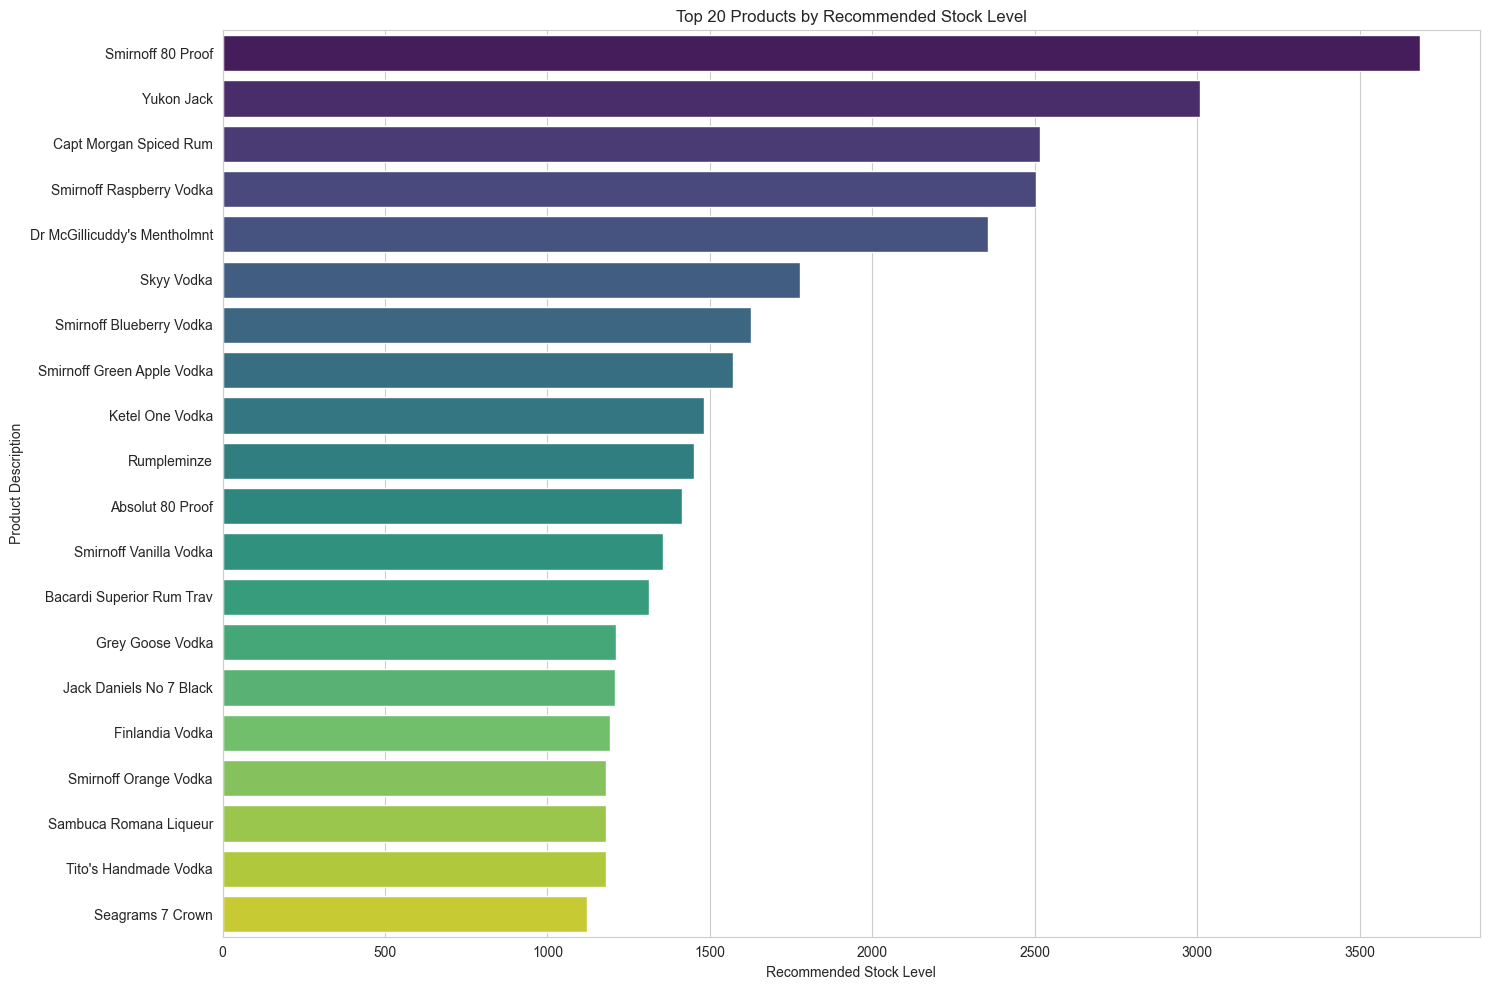

In [41]:
# Sorting the data by Recommended_Stock_Level for better visualization
sorted_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)
#Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')
plt.xlabel('Recommended Stock Level')
plt.ylabel('Product Description')
plt.title('Top 20 Products by Recommended Stock Level')
plt.tight_layout()
plt.show()

The bar chart visually represents the recommended stock levels for the top 20 products. "Smirnoff 80 Proof" stands out as the product with the highest suggested stock level, indicating it has a high sales velocity and/or longer lead times. Conversely, products at the bottom of the chart like "Sambuca Romana Liqueur" have comparatively lower recommended stock levels. This visualization helps in quick decision-making regarding inventory replenishment and allocatio

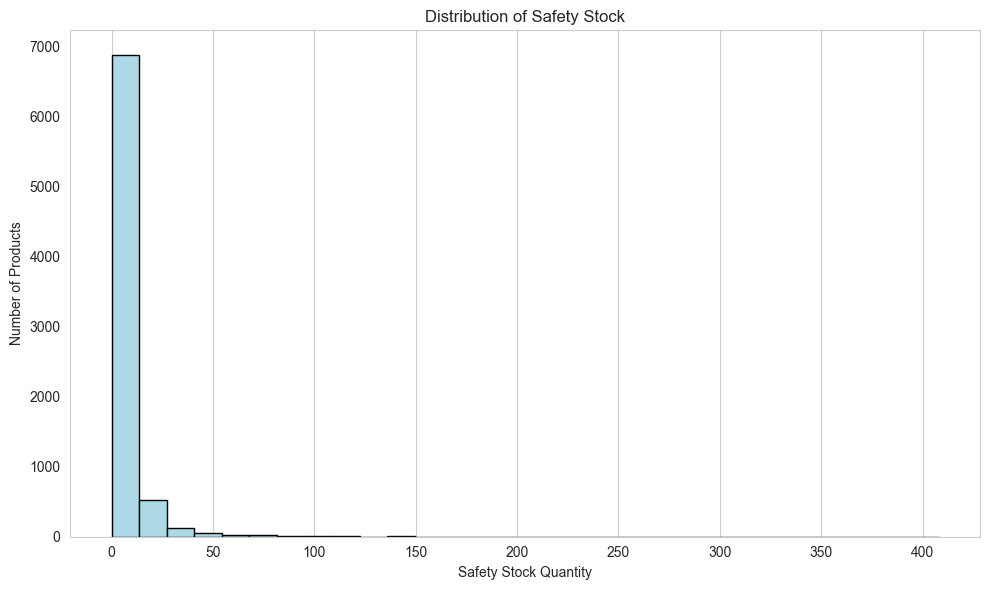

In [42]:
# Plotting the histogram for Safety Stock distribution
plt.figure(figsize=(10,6))
plt.hist(merged_data['Safety_Stock'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Safety Stock')
plt.xlabel('Safety Stock Quantity')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The histogram illustrates the distribution of safety stock quantities across products. Most noticeably, a significant majority of products have their safety stock quantities clustered around zero. This means that for many products, there is either no safety stock or a very minimal amount.

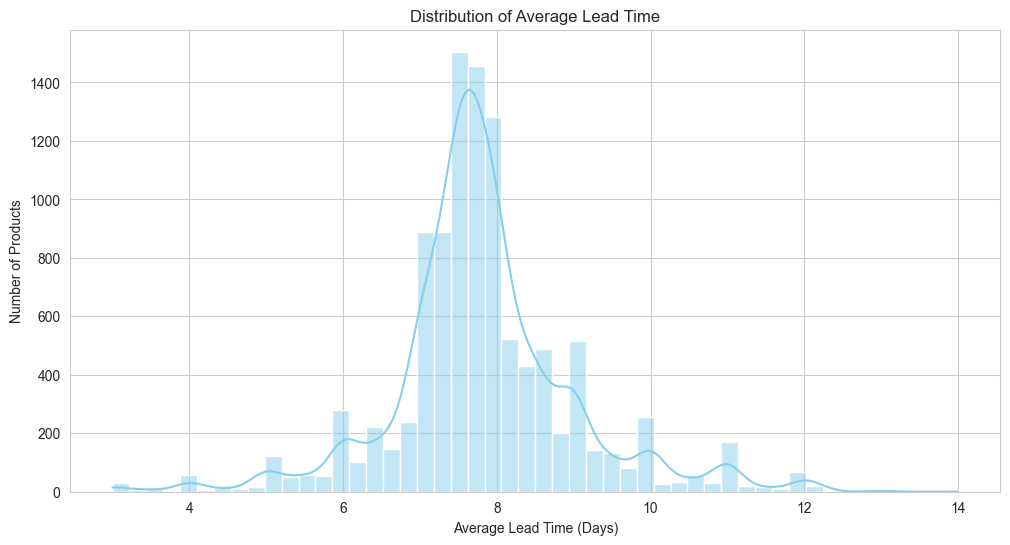

In [45]:
# Styling
sns.set_style("whitegrid")

# Creating the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=lead_time_stats, x='Avg_Lead_Time', bins=50, color='skyblue', kde=True)
plt.title('Distribution of Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Number of Products')
plt.show()

The histogram illustrates the distribution of average lead times for products. The peak around 8 days suggests that most products have an average lead time of approximately 8 days. There are also some products with shorter or longer lead times, as seen in the spread between 4 to 14 days. The smooth line (Kernel Density Estimation) provides a clearer view of the distribution's shape, confirming the concentration around the 8-day mark.

C:\Users\LARISSA\AppData\Local\Temp\ipykernel_6996\2248841356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='SalesVelocity', data=top_products, palette='viridis')


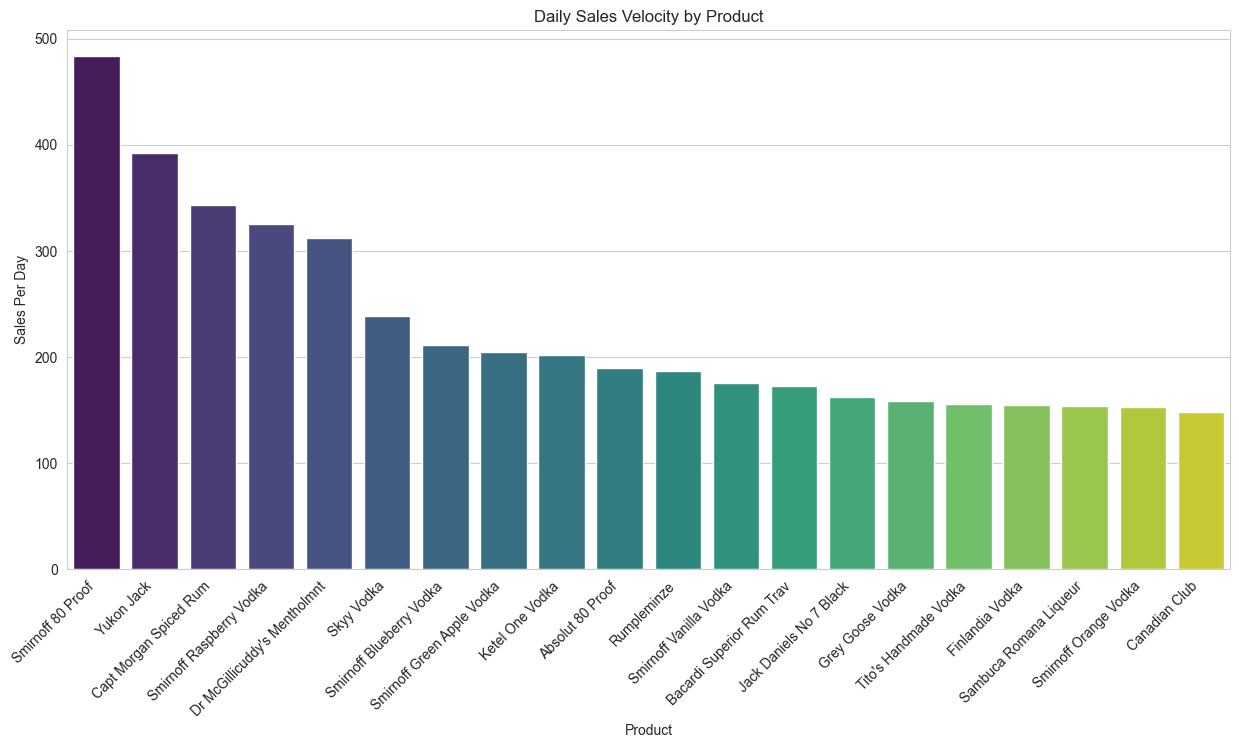

In [46]:
# Sorting the data by Sales_Per_Day in descending order to get top products
top_products = sales_velocity.sort_values(by='SalesVelocity', ascending=False).head(20)  # you can adjust the number as needed

# Creating the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Description', y='SalesVelocity', data=top_products, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Daily Sales Velocity by Product')
plt.xlabel('Product')
plt.ylabel('Sales Per Day')
plt.show()

This bar chart showcases the daily sales velocity of various products. At a glance, it's evident that "Smirnoff 80 Proof" has the highest sales per day, significantly outpacing other products. As we move to the right of the chart, the sales per day for each product decreases, indicating a descending order of popularity or demand. The varying shades of color from dark to light also emphasize this declining trend in sales velocity. It provides valuable insights for inventory management, helping businesses prioritize which products to stock more frequently based on their sales rate.

8. Optimal Stock Level Calculation

In [48]:
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])
latest_inventory_date = end_inv['endDate'].max()
current_inventory = end_inv[end_inv['endDate'] == latest_inventory_date]

#Summarizing the current stock levels by product
current_stock_levels = current_inventory.groupby(['Brand', 'Description']).agg(Current_Stock=('onHand', 'sum')).reset_index()
#Merging current stock levels with recommended stock levels
final_data = pd.merge(merged_data, current_stock_levels, on=['Brand', 'Description'], how='left')
# Assume zero current stock for any products not present in the current inventory.
final_data['Current_Stock'] = final_data['Current_Stock'].fillna(0)
# Calculating how much of each product needs to be ordered if current stock is below recommended levels.
final_data['Order_Quantity'] = final_data['Recommended_Stock_Level'] - final_data['Current_Stock']
final_data['Order_Quantity'] = final_data['Order_Quantity'].clip(lower=0)  # Setting negative order quantities to zero.

# Reporting the results.
print(final_data[['Brand', 'Description', 'Current_Stock', 'Recommended_Stock_Level', 'Order_Quantity']])

      Brand                   Description  Current_Stock  \
0        58   Gekkeikan Black & Gold Sake          385.0   
1        60        Canadian Club 1858 VAP          146.0   
2        61         Margaritaville Silver           12.0   
3        62      Herradura Silver Tequila          459.0   
4        63    Herradura Reposado Tequila          442.0   
...     ...                           ...            ...   
7653  90084  Les Fiefs Lagrange St Jul 11            2.0   
7654  90085  Ch Lilian 09 Ladouys St Este            6.0   
7655  90086  La Dame Montrose St Estep 11           32.0   
7656  90087  Ch Mouton Rothschild 12 Paui           45.0   
7657  90089    Ch Lynch Bages 12 Pauillac          124.0   

      Recommended_Stock_Level  Order_Quantity  
0                   39.990104        0.000000  
1                   16.996855        0.000000  
2                   14.894394        2.894394  
3                   20.384988        0.000000  
4                   18.042373        0.

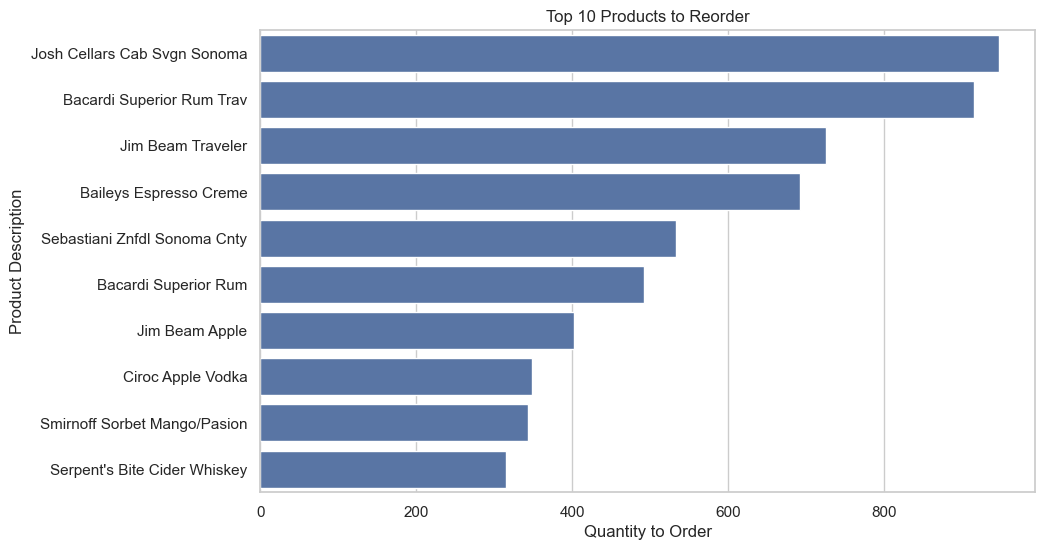

In [49]:
# Creating a graph using Seaborn.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Quantity', y='Description', data=final_data.sort_values('Order_Quantity', ascending=False).head(10))
plt.title('Top 10 Products to Reorder')
plt.xlabel('Quantity to Order')
plt.ylabel('Product Description')
plt.show()

From the graph, we can observe the following:

1. The product "Josh Cellars Cab Svgn Sonoma" has the highest quantity to reorder, approaching the 800-unit mark.
"Bacardi Superior Rum Trav" and "Jim Beam Traveler" follow next with slightly less quantity to order, both near or above the 600-unit mark.
2. Other products like "Baileys Espresso Creme" and "Sebastiani Znfdl Sonoma Cnty" are in the middle range with quantities to order around 400 units.
3. The product with the least quantity to reorder among the top 10 is "Serpent's Bite Cider Whiskey," which is just below the 200-unit mark.

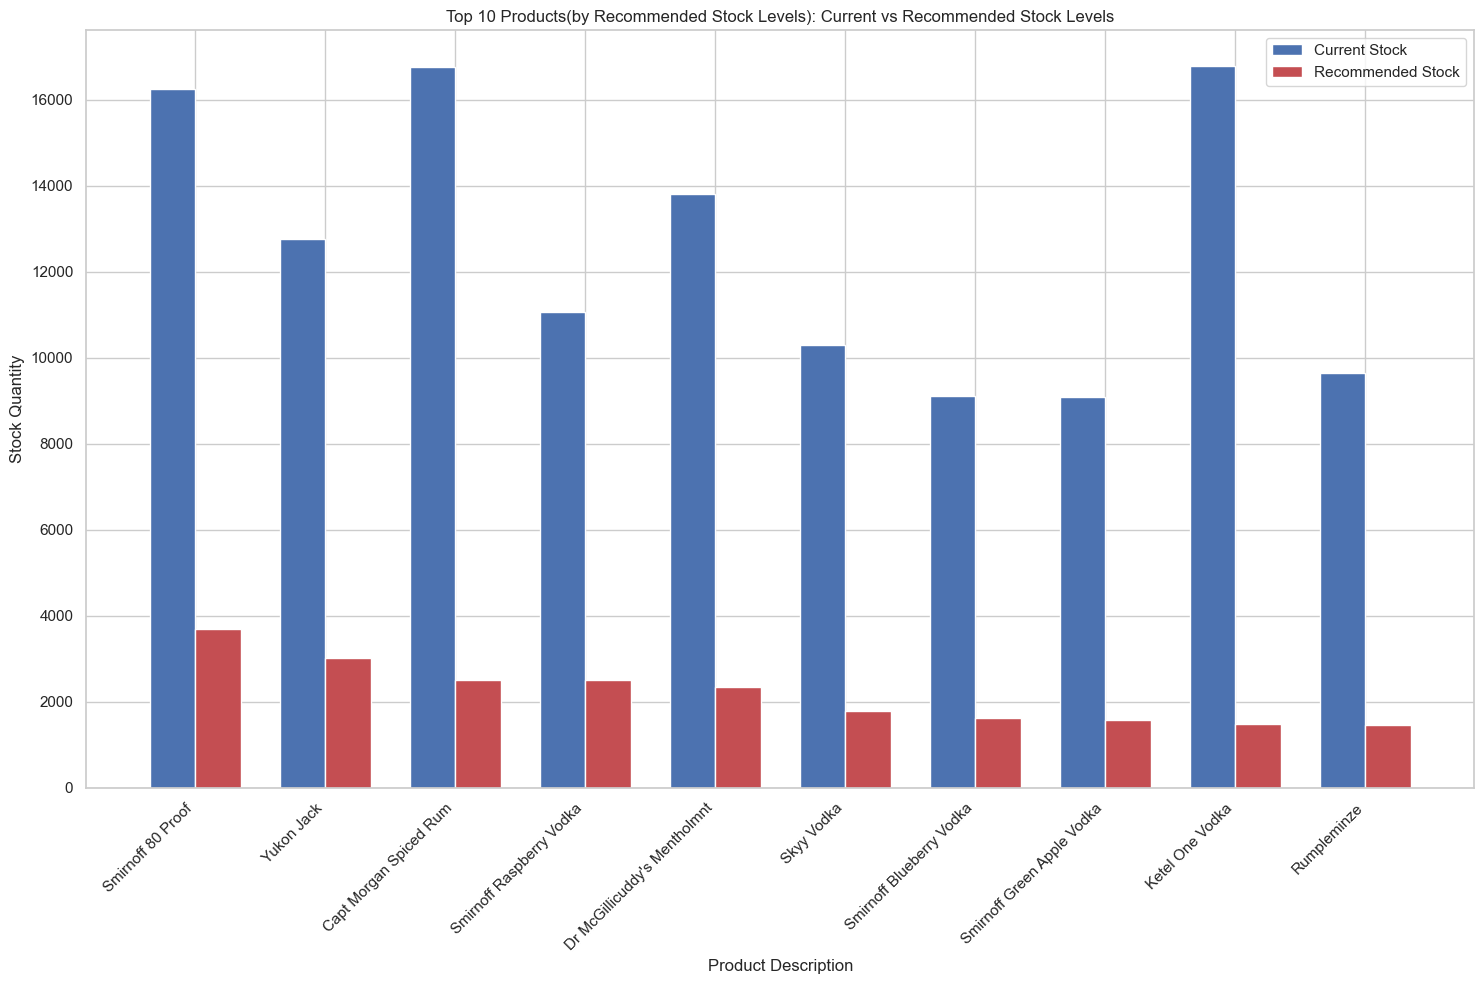

In [50]:
# Sorting the products by recommended stock level
sorted_data = final_data.sort_values(by='Recommended_Stock_Level', ascending=False).head(10)  # To show the top 10 products

# Creating a double-column bar chart
bar_width = 0.35
index = np.arange(len(sorted_data))

plt.figure(figsize=(15, 10))
bar1 = plt.bar(index, sorted_data['Current_Stock'], bar_width, label='Current Stock', color='b')
bar2 = plt.bar([i + bar_width for i in index], sorted_data['Recommended_Stock_Level'], bar_width, label='Recommended Stock', color='r')

# Setting the labels and title
plt.xlabel('Product Description')
plt.ylabel('Stock Quantity')
plt.title('Top 10 Products(by Recommended Stock Levels): Current vs Recommended Stock Levels')
plt.xticks([i + bar_width / 2 for i in index], sorted_data['Description'], rotation=45, ha='right')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

This inventory review highlights a significant surplus in the current stock levels when compared with the recommended stock levels for the top 10 products, sorted by the recommended quantity. Notably, "Ketel One Vodka" and "Rumpleminze" showcase a pronounced excess beyond the suggested inventory, suggesting inefficiencies in stock management. The presence of stock quantities exceeding recommended levels across all observed items may lead to higher carrying costs and risk of stock becoming outdated. Immediate measures such as revising purchase orders and aligning with sales projections are advised to mitigate the risks associated with overstocking and to optimize the stock turnover ratio.

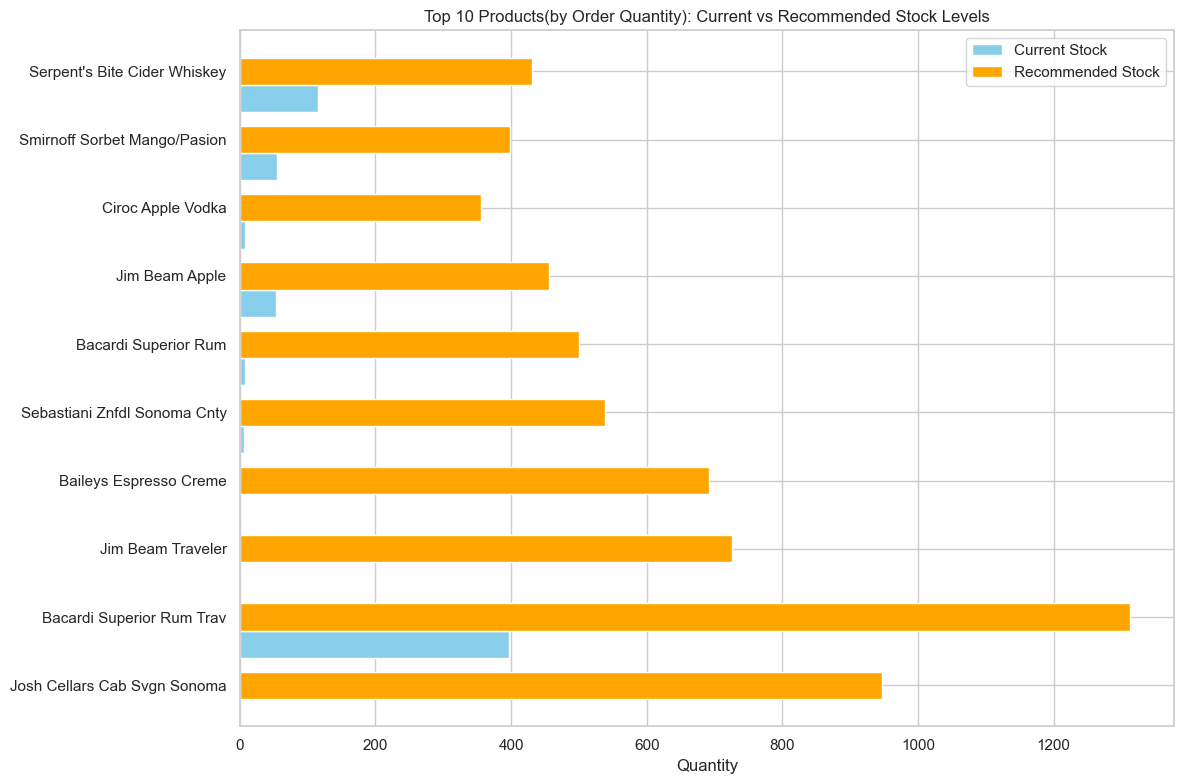

In [51]:
# Filtering the data to show the top 10 products where the ordering quantity is highest
top_products_to_order = final_data.nlargest(10, 'Order_Quantity')

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 8))

# Indexing for the bars
ind = np.arange(len(top_products_to_order))

# Width of the bars
bar_width = 0.4

# Plotting current stock and recommended stock side by side
ax.barh(ind, top_products_to_order['Current_Stock'], bar_width, color='skyblue', label='Current Stock')
ax.barh([i + bar_width for i in ind], top_products_to_order['Recommended_Stock_Level'], bar_width, color='orange', label='Recommended Stock')

# Setting the y-axis labels to product descriptions
ax.set(yticks=[i + bar_width for i in ind], yticklabels=top_products_to_order['Description'], ylim=[2 * bar_width - 1, len(ind)])

# Adding the legend
ax.legend()

# Adding labels and title
ax.set_xlabel('Quantity')
ax.set_title('Top 10 Products(by Order Quantity): Current vs Recommended Stock Levels')

# Display the plot
plt.tight_layout()
plt.show()

The graph titled "Top 10 Products (by Order Quantity): Current vs Recommended Stock Levels" shows that for all top-selling 10 products, the current stock (blue) is below the recommended stock levels (orange), indicating a need for restocking to meet the suggested inventory.